In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib
import seaborn as sns
from utils import calc
from utils import tfim

data_dir = "/home/stavros/DATA/ClockV3/histories"
dense_data_dir = "/home/stavros/DATA/ClockV3/final_dense"

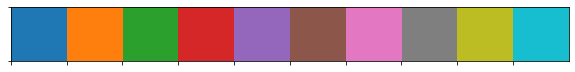

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

cp = sns.color_palette()
sns.palplot(cp)
plt.show()

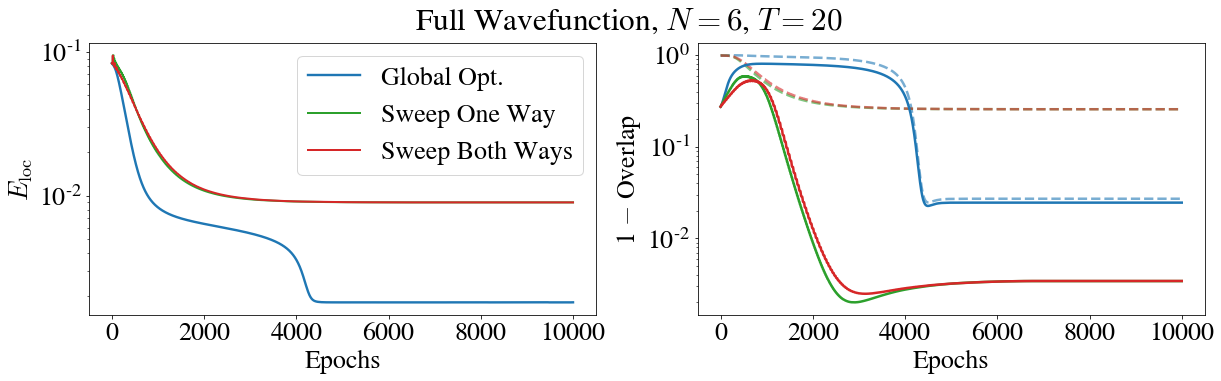

In [70]:
machine_type = "fullwv"
title_type = "Full Wavefunction"
n_sites = 6
time_steps = 20

all_states = h5py.File("{}/allstates_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")
sweep = h5py.File("{}/sweep_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")
sweep_ow = h5py.File("{}/sweep_oneway_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Global Opt.", color=cp[0], linewidth=2.4)
plt.semilogy(sweep_ow["exact_Eloc"][:].real, label="Sweep One Way", color=cp[2], linewidth=2.0)
plt.semilogy(sweep["exact_Eloc"][:].real, label="Sweep Both Ways", color=cp[3], linewidth=2.0)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], linestyle="--", label="Global Opt.", linewidth=2.5, color=cp[0], alpha=0.6)
plt.semilogy(1 - sweep_ow["overlaps"][:], linestyle="--", label="Sweep One Way", linewidth=2.5, color=cp[2], alpha=0.6)
plt.semilogy(1 - sweep["overlaps"][:], linestyle="--", label="Sweep Both Ways", linewidth=2.5, color=cp[3], alpha=0.6)
plt.semilogy(1 - all_states["avg_overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sweep_ow["avg_overlaps"][:], label="Sweep OneWay", linewidth=2.5, color=cp[2])
plt.semilogy(1 - sweep["avg_overlaps"][:], label="Sweep", linewidth=2.5, color=cp[3])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
#plt.legend()

#plt.show()
plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')


all_states.close()
sweep.close()
sweep_ow.close()

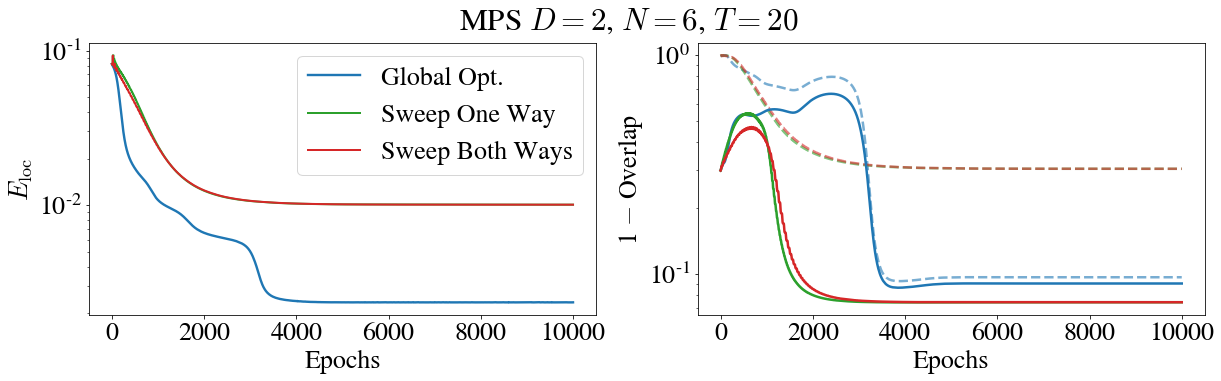

In [69]:
machine_type = "mpsD2"
title_type = "MPS $D=2$"
n_sites = 6
time_steps = 20

all_states = h5py.File("{}/allstates_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")
sweep = h5py.File("{}/sweep_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")
sweep_ow = h5py.File("{}/sweep_oneway_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Global Opt.", color=cp[0], linewidth=2.4)
plt.semilogy(sweep_ow["exact_Eloc"][:].real, label="Sweep One Way", color=cp[2], linewidth=2.0)
plt.semilogy(sweep["exact_Eloc"][:].real, label="Sweep Both Ways", color=cp[3], linewidth=2.0)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], linestyle="--", label="Global Opt.", linewidth=2.5, color=cp[0], alpha=0.6)
plt.semilogy(1 - sweep_ow["overlaps"][:], linestyle="--", label="Sweep One Way", linewidth=2.5, color=cp[2], alpha=0.6)
plt.semilogy(1 - sweep["overlaps"][:], linestyle="--", label="Sweep Both Ways", linewidth=2.5, color=cp[3], alpha=0.6)
plt.semilogy(1 - all_states["avg_overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sweep_ow["avg_overlaps"][:], label="Sweep OneWay", linewidth=2.5, color=cp[2])
plt.semilogy(1 - sweep["avg_overlaps"][:], label="Sweep", linewidth=2.5, color=cp[3])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
#plt.legend()

#plt.show()
plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')


all_states.close()
sweep.close()
sweep_ow.close()

In [13]:
n_sites = 6
time_steps = 20

tvmc = h5py.File("{}/tvmc_allstates_mpsd2_6_N{}M{}.h5py".format(data_dir, n_sites, time_steps), "r")
tvmc.close()

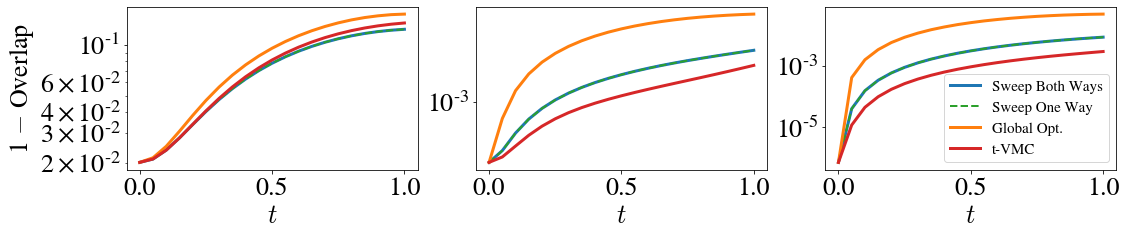

In [73]:
n_sites = 6
time_steps = 20
d_bond_list = [2, 4, 6]
t_final = 1.0
t_grid = np.linspace(0, t_final, time_steps + 1)

exact_state, _ = tfim.tfim_exact_evolution(n_sites, t_final, time_steps, h0=1.0, h=0.5)
plt.figure(figsize=(24, 3))
for i, d_bond in enumerate(d_bond_list):
    global_state = np.load("{}/allstates_mpsD{}_N{}M{}.npy".format(dense_data_dir, d_bond, n_sites, time_steps)) 
    sweep_state = np.load("{}/sweep_mpsD{}_N{}M{}.npy".format(dense_data_dir, d_bond, n_sites, time_steps))
    sweep_oneway_state = np.load("{}/sweep_oneway_mpsD{}_N{}M{}.npy".format(dense_data_dir, d_bond, n_sites, time_steps))
    tvmc_state = np.load("{}/tvmc/tvmc_allstates_stepmpsD{}_N{}M{}.npy".format(dense_data_dir, d_bond, n_sites, time_steps))

    sweep_ov = calc.time_overlap(sweep_state, exact_state)
    sweep_oneway_ov = calc.time_overlap(sweep_oneway_state, exact_state)
    sweep_tvmc_ov = calc.time_overlap(tvmc_state, exact_state)
    global_ov = calc.time_overlap(global_state, exact_state)

    plt.subplot(141 + i)
    plt.semilogy(t_grid, 1 - sweep_ov, label="Sweep Both Ways", linewidth=3.0, color=cp[0])
    plt.semilogy(t_grid, 1 - sweep_oneway_ov, label="Sweep One Way", linewidth=2.0, color=cp[2], linestyle="--")
    plt.semilogy(t_grid, 1 - global_ov, label="Global Opt.", linewidth=3.0, color=cp[1])
    plt.semilogy(t_grid, 1 - sweep_tvmc_ov, label="t-VMC", linewidth=3.0, color=cp[3])
    plt.xlabel("$t$")
    if i == 0:
        plt.ylabel("1 $-$ Overlap")
    if i == 2:
        plt.legend(fontsize=15)

#plt.show()
plt.savefig("overlap_clocksweep_tvmc_N{}M{}.pdf".format(n_sites, time_steps), bbox_inches='tight')
